In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [6]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [10]:
df[target]

0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: default, Length: 1000, dtype: int64

In [9]:
preprocessing.LabelEncoder().fit_transform(df[target])

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [23]:
%%time 

target = "default"
X = df.copy()
del X[target]
y = preprocessing.LabelEncoder().fit_transform(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(random_state=1
                        , max_iter=1000))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)



CPU times: user 1.31 s, sys: 33.3 ms, total: 1.34 s
Wall time: 1.11 s


(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1c923c88>)

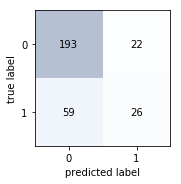

In [24]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [25]:
len(y_test)

300

In [26]:
print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))


Training
accuracy: 0.992857
precision: 0.995283
recall: 0.981395

Test
accuracy: 0.730000
precision: 0.541667
recall: 0.305882


In [27]:
pd.read_csv("/data/creditcard-fraud.csv")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
